In [52]:
""" Compute and combine cell type abundances from different quantification methods necessary for TF learning
Args: 
    clinical_file (str): path pointing to a txt or tsv file
    path_published_data (str): path pointing to a folder containing published computed features
    path_computed_features (str): path pointing to a folder containing the files generated with immunedeconv
    data_path (str): path pointing to a folder where the dataframe containing all features should be stored, stored as .txt file

Returns: 
    ./task_selection_names.pkl: pickle file containing variable names. 
    {data_path}/TCGA_{cancer_type}_ensembled_selected_tasks.csv" containing the following cell type quantification methods: 
        tumor_purity = [
            'tumor purity (ABSOLUTE)',
            'tumor purity (ESTIMATE)',
            'tumor purity (EPIC)'
        ]

        T_cells = [
            'CD8 T cells (Thorsson)', 
            'Cytotoxic cells',
            'Effector cells',
            'CD8 T cells (quanTIseq)', 
            'TIL score',
            'Immune score', 
        ]

        endothelial_cells = [
            'Endothelial cells (xCell)',
            'Endothelial cells (EPIC)', 
            'Endothelium', ]

        CAFs = [
            'Stromal score',
            'CAFs (MCP counter)', 
            'CAFs (EPIC)',
            'CAFs (Bagaev)',
        ]

"""

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append(f"{os.path.dirname(os.getcwd())}/libs")
import joblib
import model.preprocessing as preprocessing

In [53]:
# Final feature selection
tumor_purity = [
    'tumor purity (ABSOLUTE)',
    'tumor purity (ESTIMATE)',
    'tumor purity (EPIC)'
]

T_cells = [
    'CD8 T cells (Thorsson)', 
    'Cytotoxic cells',
    'Effector cells',
    'CD8 T cells (quanTIseq)', 
    'TIL score',
    'Immune score', 
]

endothelial_cells = [
    'Endothelial cells (xCell)',
    'Endothelial cells (EPIC)', 
    'Endothelium', ]

CAFs = [
    'Stromal score',
    'CAFs (MCP counter)', 
    'CAFs (EPIC)',
    'CAFs (Bagaev)',
]

IDs = ['slide_submitter_id', 'sample_submitter_id',
    ]

tile_vars = ['Section', 'Coord_X', 'Coord_Y', "tile_ID"]
var_dict = {
    "CAFs": CAFs, 
    "T_cells": T_cells,
    "tumor_purity": tumor_purity,
    "endothelial_cells": endothelial_cells,
    "IDs":IDs,
    "tile_IDs": tile_vars
}


In [63]:
ensembled_tasks = pd.read_csv("/Users/joankant/Library/CloudStorage/OneDrive-TUEindhoven/spotlight/data/TCGA_FF_SKCM_ensembled_selected_tasks.csv", sep="\t")

In [64]:
ensembled_tasks

,Unnamed: 0,slide_submitter_id,sample_submitter_id,Stromal score,CAFs (MCP counter),CAFs (EPIC),CAFs (Bagaev),Endothelial cells (xCell),Endothelial cells (EPIC),Endothelium,CD8 T cells (Thorsson),Cytotoxic cells,Effector cells,CD8 T cells (quanTIseq),TIL score,Immune score,tumor purity (ABSOLUTE),tumor purity (ESTIMATE),tumor purity (EPIC)
0,0,TCGA-D3-A8GP-06A-01-TSA,TCGA-D3-A8GP-06A,-1344.95,12.365915,-0.558672,-1.405636,-9.965784,0.398655,-0.791017,NaN,-0.792303,-0.322414,-1.050480,NaN,-701.88,0.96,0.953987,6.554462
1,1,TCGA-D3-A8GP-06A-02-TSB,TCGA-D3-A8GP-06A,-1344.95,12.365915,-0.558672,-1.405636,-9.965784,0.398655,-0.791017,NaN,-0.792303,-0.322414,-1.050480,NaN,-701.88,0.96,0.953987,6.554462
2,2,TCGA-RP-A693-06A-01-TSA,TCGA-RP-A693-06A,-111.96,14.026881,1.472494,0.034285,1.381597,1.486456,0.980811,NaN,0.317324,0.694457,1.946440,NaN,1021.12,0.32,0.739519,6.392896
3,3,TCGA-EE-A3JD-06A-01-TSA,TCGA-EE-A3JD-06A,171.95,13.045782,0.177346,-0.953539,0.172958,1.346354,1.078788,NaN,0.643999,1.877063,3.106620,NaN,2555.57,0.18,0.535787,6.133479
4,4,TCGA-FS-A4FC-06A-01-TS1,TCGA-FS-A4FC-06A,-354.19,14.808803,2.431991,1.194521,-9.965784,1.319356,0.237883,NaN,-0.225290,-0.333677,-1.005219,NaN,-60.20,0.59,0.855563,6.446450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,TCGA-ER-A194-01A-01-TSA,TCGA-ER-A194-01A,-45.32,13.492952,1.210905,0.433563,3.515978,1.754101,2.188783,0.9506,0.421537,1.153937,0.896493,0.393,1117.54,0.60,0.723197,6.495422
379,379,TCGA-EE-A2MH-06A-01-TSA,TCGA-EE-A2MH-06A,-466.25,12.613355,-0.395582,-0.835996,2.285915,1.099373,1.341252,NaN,0.327490,1.265409,1.950049,NaN,1472.69,0.43,0.729831,6.422688
380,380,TCGA-EE-A3AF-06A-01-TSA,TCGA-EE-A3AF-06A,-225.54,13.956627,1.871160,0.340345,-9.965784,0.202723,-0.229261,NaN,-0.038672,0.362225,0.714307,NaN,862.83,0.78,0.765786,6.490166
381,381,TCGA-EE-A2MU-06A-02-TSB,TCGA-EE-A2MU-06A,375.11,15.927067,4.209411,1.266537,-9.965784,-2.461748,0.000569,NaN,0.596499,1.661315,2.790765,NaN,1806.58,0.29,0.601648,6.178854


<AxesSubplot:>

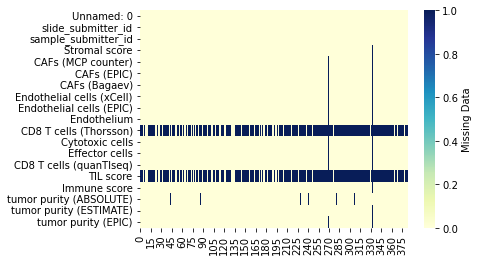

In [65]:
sns.heatmap(ensembled_tasks.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [66]:
(ensembled_tasks.isna().transpose().sum(axis=1)) / len(ensembled_tasks) #

Unnamed: 0                   0.000000
slide_submitter_id           0.000000
sample_submitter_id          0.000000
Stromal score                0.007833
CAFs (MCP counter)           0.013055
CAFs (EPIC)                  0.013055
CAFs (Bagaev)                0.013055
Endothelial cells (xCell)    0.013055
Endothelial cells (EPIC)     0.013055
Endothelium                  0.013055
CD8 T cells (Thorsson)       0.796345
Cytotoxic cells              0.010444
Effector cells               0.013055
CD8 T cells (quanTIseq)      0.013055
TIL score                    0.796345
Immune score                 0.007833
tumor purity (ABSOLUTE)      0.023499
tumor purity (ESTIMATE)      0.007833
tumor purity (EPIC)          0.013055
dtype: float64

In [67]:
len(ensembled_tasks)

383

In [68]:
tmp = ensembled_tasks[tumor_purity].dropna(how="all")
print(len(tmp))
display((tmp.isna().transpose().sum(axis=1)) / len(tmp))
display((tmp.isna().transpose().sum(axis=1)))
print(len(tmp.dropna(how="any")))

382


tumor purity (ABSOLUTE)    0.020942
tumor purity (ESTIMATE)    0.005236
tumor purity (EPIC)        0.010471
dtype: float64

tumor purity (ABSOLUTE)    8
tumor purity (ESTIMATE)    2
tumor purity (EPIC)        4
dtype: int64

370


In [69]:
tmp = ensembled_tasks[T_cells].dropna(how="all")
print(len(tmp))
display((tmp.isna().transpose().sum(axis=1)) / len(tmp))
display((tmp.isna().transpose().sum(axis=1)))
print(len(tmp.dropna(how="any")))

381


CD8 T cells (Thorsson)     0.795276
Cytotoxic cells            0.005249
Effector cells             0.007874
CD8 T cells (quanTIseq)    0.007874
TIL score                  0.795276
Immune score               0.002625
dtype: float64

CD8 T cells (Thorsson)     303
Cytotoxic cells              2
Effector cells               3
CD8 T cells (quanTIseq)      3
TIL score                  303
Immune score                 1
dtype: int64

77


In [70]:
tmp = ensembled_tasks[CAFs].dropna(how="all")
print(len(tmp))
display((tmp.isna().transpose().sum(axis=1)) / len(tmp))
display((tmp.isna().transpose().sum(axis=1)))
print(len(tmp.dropna(how="any")))

380


Stromal score         0.000000
CAFs (MCP counter)    0.005263
CAFs (EPIC)           0.005263
CAFs (Bagaev)         0.005263
dtype: float64

Stromal score         0
CAFs (MCP counter)    2
CAFs (EPIC)           2
CAFs (Bagaev)         2
dtype: int64

378


In [71]:
tmp = ensembled_tasks[endothelial_cells].dropna(how="all")
print(len(tmp))
display((tmp.isna().transpose().sum(axis=1)) / len(tmp))
display((tmp.isna().transpose().sum(axis=1)))
print(len(tmp.dropna(how="any")))

378


Endothelial cells (xCell)    0.0
Endothelial cells (EPIC)     0.0
Endothelium                  0.0
dtype: float64

Endothelial cells (xCell)    0
Endothelial cells (EPIC)     0
Endothelium                  0
dtype: int64

378
